In [711]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

In [712]:
df= pd.read_csv("dades/points_data.csv")

Sense binaritzar la variable categòrica

In [713]:
X = df.drop(['fire', 'coberta_sol'], axis=1)
y = df['fire']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [714]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Variable': X_train.columns,
    'Importància': model.coef_[0]
})

importances = importances.sort_values(by='Importància', ascending=False)

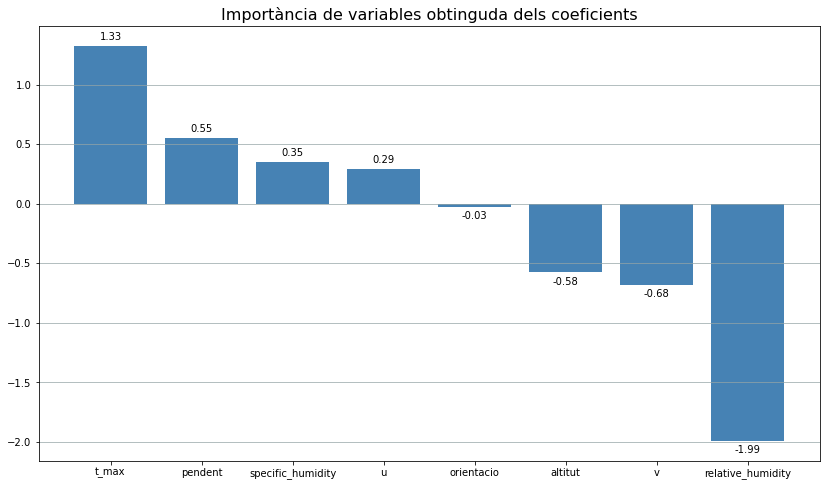

In [715]:
plt.bar(figure=plt.figure(figsize=(14, 8)), x=importances['Variable'], height=importances['Importància'], color='steelblue')
plt.title('Importància de variables obtinguda dels coeficients', size=16)
plt.xticks(rotation='horizontal')
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
for i, v in enumerate(list(importances['Importància'])):
    if v>0:
        y = v+.05 
    else:
        y = v-.10
    plt.text( i , y , str(round(v,2)), color='black', horizontalalignment='center')
plt.show()

In [716]:
importances["Importància"] = importances["Importància"].abs()
importances = importances.sort_values(by='Importància', ascending=False)

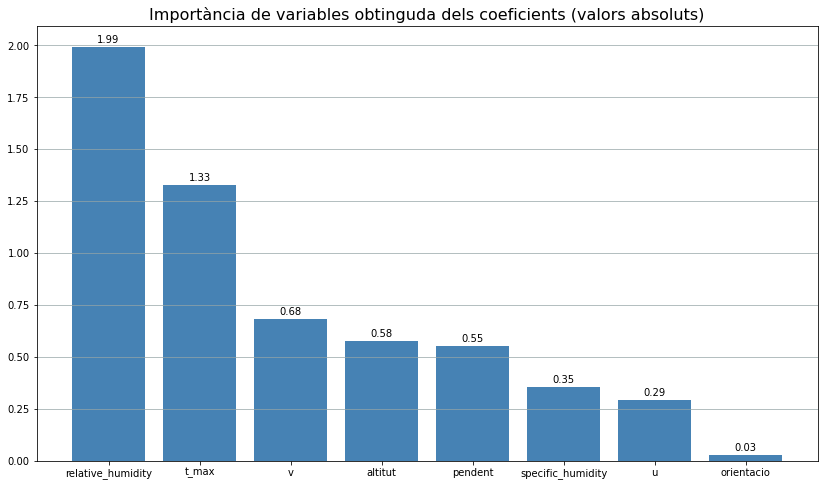

In [717]:
plt.bar(figure=plt.figure(figsize=(14, 8)), x=importances['Variable'], height=importances['Importància'], color='steelblue')
plt.title('Importància de variables obtinguda dels coeficients (valors absoluts)', size=16)
plt.xticks(rotation='horizontal')
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
for i, v in enumerate(list(importances['Importància'])):
    plt.text( i , v+.02 , str(round(v,2)), color='black', horizontalalignment='center')
plt.show()

Amb binarització de la variable categòrica la variable categòrica

In [718]:
classes = {1: "Agrícola secà", 2:"Coníferes", 3:"Caducifolies", 4:"Escleròfiles", 5:"Matollar", 6:"Prats", 7:"Bosc de ribera", 8:"Sòl nu", 9:"Aigua", 10: "Urbà", 11:"Agrícola regadiu"}
df["coberta_sol"] = df["coberta_sol"].map(classes)
X = df.drop(['fire', 'coberta_sol'], axis=1)
X = X.join(pd.get_dummies(df["coberta_sol"].astype("category")))
y = df['fire']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [719]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Variable': X_train.columns,
    'Importància': model.coef_[0]
})

importances = importances.sort_values(by='Importància', ascending=False)

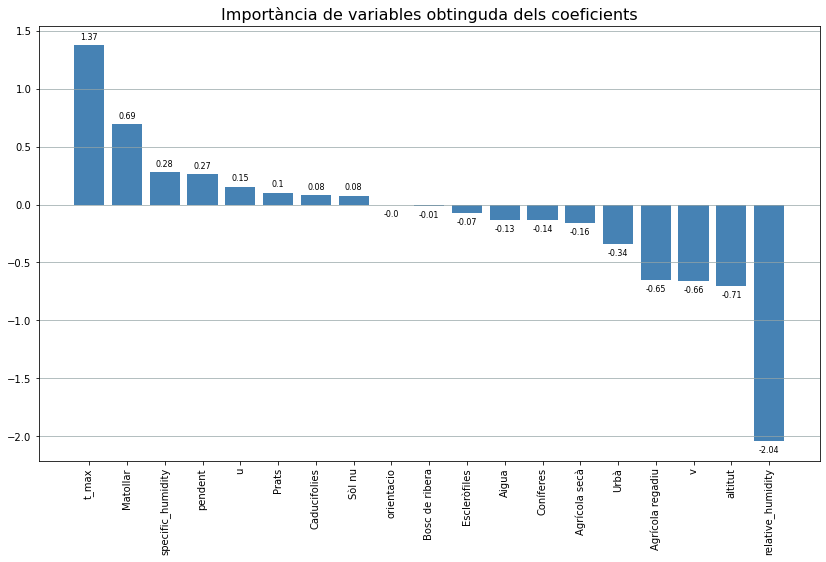

In [720]:
plt.bar(figure=plt.figure(figsize=(14, 8)), x=importances['Variable'], height=importances['Importància'], color='steelblue')
plt.title('Importància de variables obtinguda dels coeficients', size=16)
plt.xticks(rotation='vertical')
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
for i, v in enumerate(list(importances['Importància'])):
    if v>0:
        y = v+.05 
    else:
        y = v-.10
    plt.text( i , y , str(round(v,2)), color='black', horizontalalignment='center', size=8)
plt.show()

In [721]:
importances["Importància"] = importances["Importància"].abs()
importances = importances.sort_values(by='Importància', ascending=False)

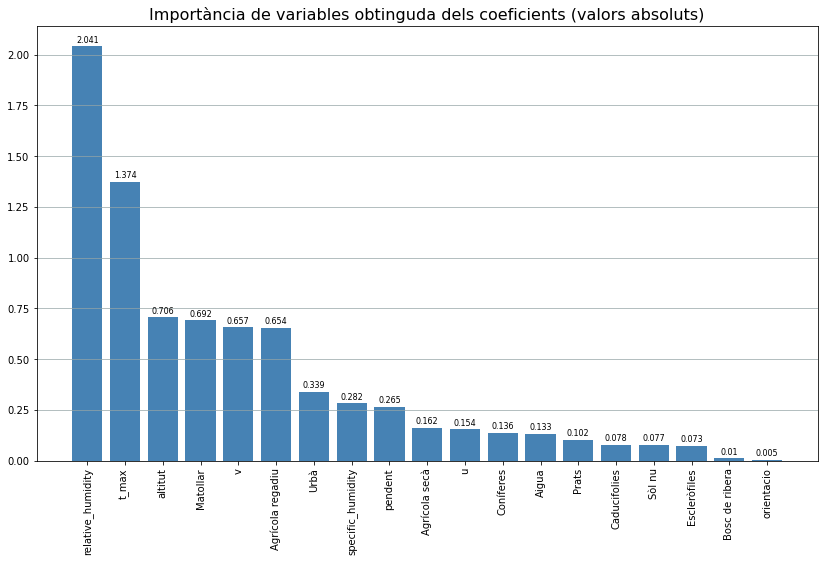

In [722]:
plt.bar(figure=plt.figure(figsize=(14, 8)), x=importances['Variable'], height=importances['Importància'], color='steelblue')
plt.title('Importància de variables obtinguda dels coeficients (valors absoluts)', size=16)
plt.xticks(rotation='vertical')
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
for i, v in enumerate(list(importances['Importància'])):
    plt.text( i , v+.02 , str(round(v,3)), color='black', horizontalalignment='center', size=8)
plt.show()